# 1 Анализ результатов линейной регрессии

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Пример 1

Пусть нам заданы 1000 точек.

In [2]:
np.random.seed(0)
x = np.random.rand(100, 1)*10
y = 1000 + 7 * np.sin(x) + 2 * np.random.randn(100, 1)

d = {'x': x.reshape(1,100)[0], 'y': y.reshape(1,100)[0]}
df = pd.DataFrame(data=d)
df['y'] = df['y']*100
df.head()

,x,y
0,5.488135,99267.240868
1,7.151894,100714.612087
2,6.027634,99916.187131
3,5.448832,99174.147565
4,4.236548,99675.414985


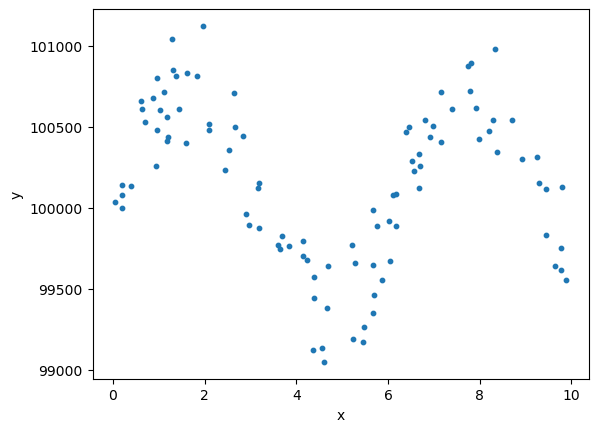

In [3]:
plt.scatter(df['x'], df['y'], s=10)
df = df.sort_values('x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Так как нужно найти более оптимальную модель, и мы видим, что график похож на график синуса, то сразу добавим переменную `sin(x)`.

In [4]:
df['x2'] = df['x'].apply(lambda x: np.sin(x))

Построим модель линейной регресии, используя две переменных: `x` и `x2`.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
train, test = train_test_split(df, train_size=0.7, random_state=123)

In [7]:
model = LinearRegression()
model.fit(train[['x', 'x2']], train[['y']])

LinearRegression()

In [8]:
train = train.sort_values('x')

In [9]:
y_predict_train = model.predict(train[['x', 'x2']])
y_predict_test = model.predict(test[['x', 'x2']])

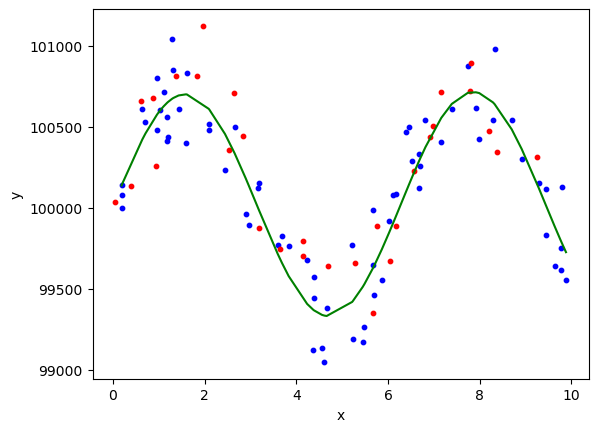

In [10]:
plt.scatter(train['x'], train['y'], s=10, c='b')
plt.scatter(test['x'], test['y'], s=10, c='r')
plt.plot(train['x'], y_predict_train, c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Видим, что график достаточно хорошо описывает наши данные. Оценим качество.

In [11]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(train[['y']], y_predict_train)
test_mse = mean_squared_error(test[['y']], y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 37675.76228688268
Test MSE: 45575.98225112494


In [12]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train[['y']], y_predict_train)
test_mae = mean_absolute_error(test[['y']], y_predict_test)
print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))

Train MAE: 166.96432586101872
Test MAE: 177.6127358520971


Дополнительно, чтобы определить, насколько адекватна построенная модель, сравним имеющиеся реальные значения `y` и предсказанные значения `y_predict`.

In [13]:
train['y_predict_train'] = y_predict_train

In [14]:
residual = train['y'] - train['y_predict_train']

Итак, мы посчитали остатки. Ещё раз проговорим, что остатки (residual) — это разница между фактическим целевым значением и спрогнозированным значением.

Построим график остатков регресии.

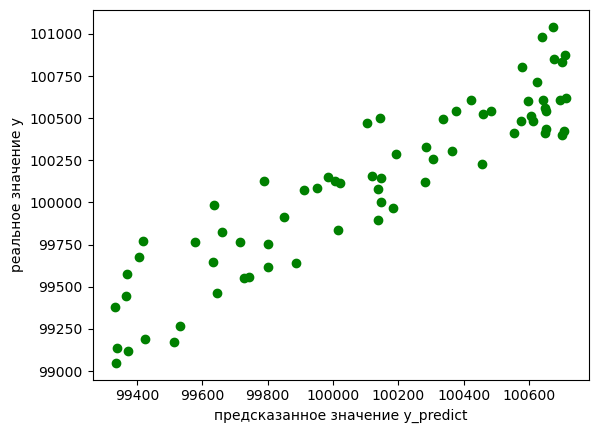

In [15]:
plt.scatter(train['y_predict_train'], train['y'], c='g')
plt.xlabel('предсказанное значение y_predict')
plt.ylabel('реальное значение y')
plt.show()

Чем сильнее точки «не укладываются» в прямую, тем несостоятельнее линейная регрессия. В нашем случае всё хорошо.

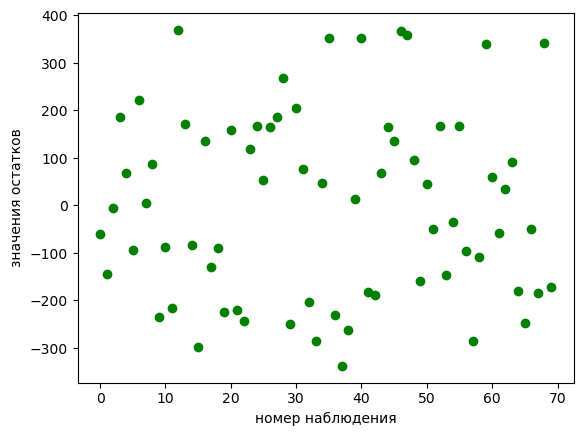

In [16]:
plt.scatter(list(range(len(y_predict_train))), residual, c='g')
plt.xlabel('номер наблюдения')
plt.ylabel('значения остатков')
plt.show()

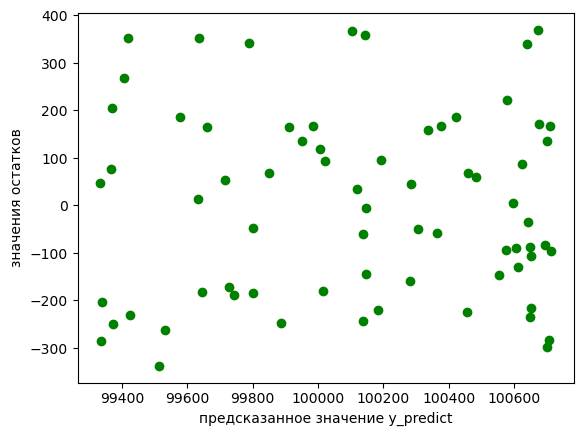

In [17]:
plt.scatter(train['y_predict_train'], residual, c='g')
plt.xlabel('предсказанное значение y_predict')
plt.ylabel('значения остатков')
plt.show()

Также часто остатки нормализуют. Сама по себе нормализация ничего дополнительного про данные не говорит. Однако это преобразование позволяет привести к «общему знаменателю» разные переменные. То есть это преобразование ничего нам не говорит про конкретный набор данных, но позволяет сравнивать разные наборы данных. Воспользуемся для нормализации функцией `preprocessing.normalize`.

In [18]:
from sklearn import preprocessing
normalized_residual = preprocessing.normalize([residual])

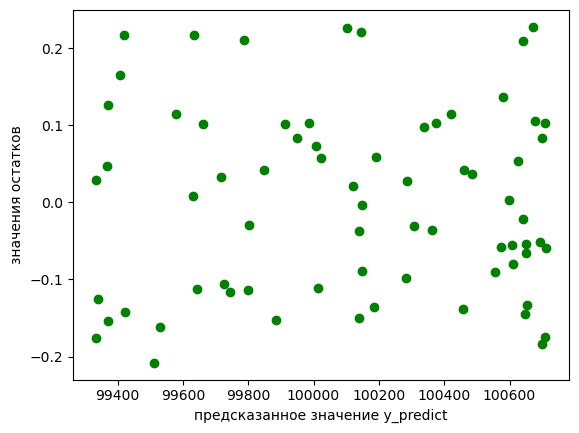

In [19]:
plt.scatter(train['y_predict_train'], normalized_residual, c='g')
plt.xlabel('предсказанное значение y_predict')
plt.ylabel('значения остатков')
plt.show()

Итак, мы получили госмоскедастичность: используя визуальный анализ, не получается найти какие-то признаки непостоянства дисперсии.

## Пример 2

Посмотрим, что произошло бы, будь наша модель изначально хуже. Воспользуемся для предсказания только переменной `x`.

In [20]:
model2 = LinearRegression()
model2.fit(train[['x']], train[['y']])

LinearRegression()

In [21]:
train = train.sort_values('x')

In [22]:
y_predict_train2 = model2.predict(train[['x']])
y_predict_test2 = model2.predict(test[['x']])

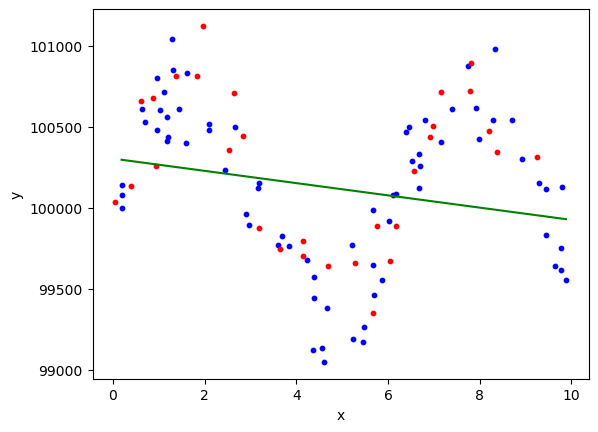

In [23]:
plt.scatter(train['x'], train['y'], s=10, c='b')
plt.scatter(test['x'], test['y'], s=10, c='r')
plt.plot(train['x'], y_predict_train2, c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Видим, что график предсказываемых значений не описывает наши данные. Оценим качество.

In [24]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(train[['y']], y_predict_train2)
test_mse = mean_squared_error(test[['y']], y_predict_test2)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 233731.25393105656
Test MSE: 221199.7104230191


In [25]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train[['y']], y_predict_train2)
test_mae = mean_absolute_error(test[['y']], y_predict_test2)
print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))

Train MAE: 403.7652888046507
Test MAE: 420.9946917322653


Очевидно, что и качество модели получилось хуже. Посмотрим на графики остатков модели в этом случае.

In [26]:
train['y_predict_train2'] = y_predict_train2

In [27]:
residual2 = train['y'] - train['y_predict_train2']

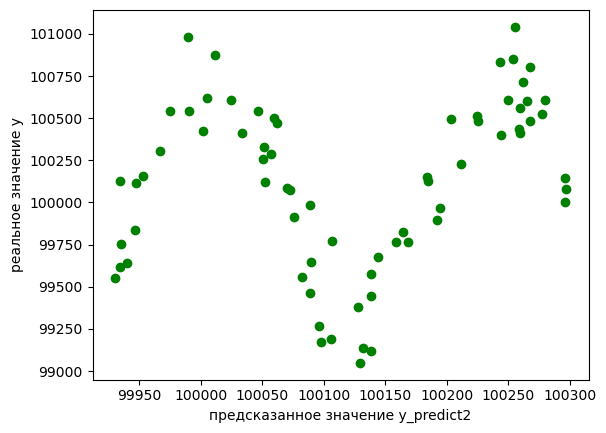

In [28]:
plt.scatter(train['y_predict_train2'], train['y'], c='g')
plt.xlabel('предсказанное значение y_predict2')
plt.ylabel('реальное значение y')
plt.show()

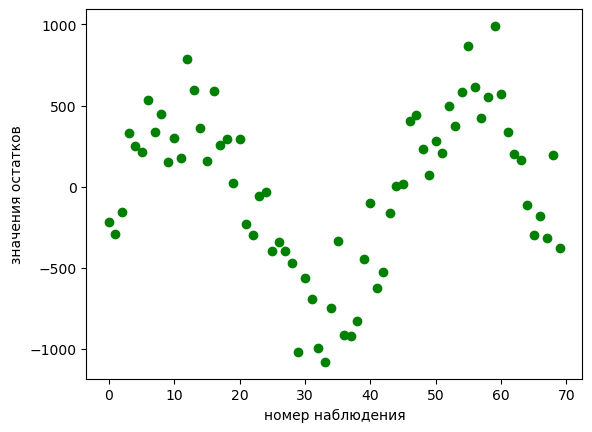

In [29]:
plt.scatter(list(range(len(y_predict_train2))), residual2, c='g')
plt.xlabel('номер наблюдения')
plt.ylabel('значения остатков')
plt.show()

Чем сильнее точки «не укладываются» в прямую, тем несостоятельнее линейная регрессия. В этом случае всё плохо, потому что мы не уловили саму зависимость моделью: теперь и ошибки модели имеют зависимость, это гетероскедастичность.

## Коэффициент детерминации

Для упрощения расчётов импортируем библиотеку.

In [30]:
from sklearn.metrics import r2_score

#### Для модели 1

In [31]:
residual = train['y'] - train['y_predict_train']
total = train['y'] - train['y'].mean()

train_r2 = 1 - sum(residual.apply(lambda x: x**2))/sum(total.apply(lambda x: x**2))
print("Train R2: {}".format(train_r2))

Train R2: 0.8469519198470556


Или напрямую из модели.

In [32]:
model.score(train[['x', 'x2']], train[['y']])

0.8469519198470555

Или с помощью `sklearn`.

In [33]:
train_r2 = r2_score(train[['y']], y_predict_train)
test_r2 = r2_score(test[['y']], y_predict_test)
print("Train R2: {}".format(train_r2))
print("Test R2: {}".format(test_r2))

Train R2: 0.8469519198470555
Test R2: 0.7757882725728253


Получили коэффициент детерминации выше 0.8. А значит, можно признать модель достаточно хорошей.

#### Для модели 2

In [34]:
train_r2 = r2_score(train[['y']], y_predict_train2)
test_r2 = r2_score(test[['y']], y_predict_test2)
print("Train R2: {}".format(train_r2))
print("Test R2: {}".format(test_r2))

Train R2: 0.050526983010955595
Test R2: -0.08819528906832907


Если R2=0, значит мы рассчитали просто среднее значение y. Из чего, в свою очередь, следует, что модель получилась не очень удачной. А если R2<0, то выходит, что разработанная вами модель даёт прогноз даже хуже, чем простое усреднение. И нужно более внимательно исследовать данные.